In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn as sbn
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model


from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

### Question 1. Fit a polynomial model 
of degree $M=10$ to the data below. Perform Lasso regularization, fitting the model over data1_1, selecting the optimal value of the regularization parameter over the data1_2 (based on validation R2) and testing performance over the data1_3.

Important - standardize the data before training Lasso model and apply the same $\mu$ and $\sigma$ defined over data1_1 to data1_2 and data1_3 during validation/testing (as we are not supposed to learn anything, including normalization coefficients from validation and test data; all the parameters of the model are to be learned from training data exclusively).

Visualize the final model against all the data from from training, validation and test samples on the same plot using different colors for points from different samples. For comparison also visualize the true model used to generate the data below - $y=x^4/100+x^3/20+x^2/3+2$.

Output the coefficients of the model.

In [34]:
#generate data and put it in the dataframe
np.random.seed(2018)
x=np.arange(-10,20,0.5)
y=x**4/100+x**3/20+x**2/3+2*x+np.random.normal(loc=0,scale=3,size=60)
data1=pd.DataFrame({'x':x,'y':y}) #create a dataframe
raw_data = data1
#slice the data in three pieces (we'll talk about those later)
data1_2=data1.loc[40:49]
data1_3=data1.loc[50:59]
data2 = data1_2
data3 = data1_3
data1=data1.loc[0:39] 
data1.head() #for now let's stick with this first one

,x,y
0,-10.0,62.503031
1,-9.5,51.410761
2,-9.0,44.605198
3,-8.5,24.739247
4,-8.0,22.200164


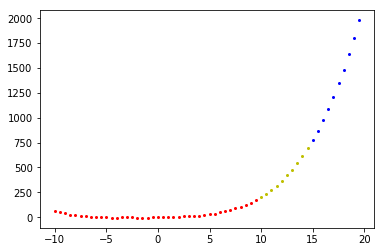

In [35]:
plt.plot(data1.x, data1.y, 'ro', markersize = 2)
plt.plot(data1_2.x, data1_2.y, 'yo', markersize = 2)
plt.plot(data1_3.x, data1_3.y, 'bo', markersize = 2)

/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     978.4
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           7.19e-34
Time:                        10:04:22   Log-Likelihood:                -91.583
No. Observations:                  40   AIC:                             205.2
Df Residuals:                      29   BIC:                             223.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2196      1.205     -0.182      0.8

/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0,0.5,'y')

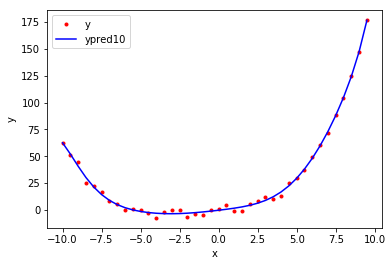

In [38]:
#consider just the model of degree M=10
M = 10
# generate regressors as powers of x
for p in range(1, M+1):
    data1[ 'x%d' %p ] = data1.x**p
data1.head()

for p in range(1, M+1):
    data1_2[ 'x%d' %p ] = data1_2.x**p
    
for p in range(1, M+1):
    data1_3[ 'x%d' %p ] = data1_3.x**p
    
formula_10 = 'y~x+' + '+'.join( ['x%d' %p for p in range(2,M+1) ] ); formula_10
lm_hw = smf.ols(formula = formula_10, data = data1).fit()
print ( lm_hw.summary( ) )

data1['ypred10'] = lm_hw.predict( )
plt.plot(data1.x, data1.y, '.r' )
plt.plot(data1.x, data1.ypred10, 'b' )
plt.legend()
plt.xlabel ( 'x' )
plt.ylabel ( 'y' )

In [39]:
data1_2

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
40,10.0,204.579091,10.0,100.00,1000.000,10000.0000,100000.00000,1.000000e+06,1.000000e+07,1.000000e+08,1.000000e+09,1.000000e+10
41,10.5,234.807204,10.5,110.25,1157.625,12155.0625,127628.15625,1.340096e+06,1.407100e+07,1.477455e+08,1.551328e+09,1.628895e+10
42,11.0,272.883209,11.0,121.00,1331.000,14641.0000,161051.00000,1.771561e+06,1.948717e+07,2.143589e+08,2.357948e+09,2.593742e+10
43,11.5,318.039709,11.5,132.25,1520.875,17490.0625,201135.71875,2.313061e+06,2.660020e+07,3.059023e+08,3.517876e+09,4.045558e+10
44,12.0,368.274565,12.0,144.00,1728.000,20736.0000,248832.00000,2.985984e+06,3.583181e+07,4.299817e+08,5.159780e+09,6.191736e+10
45,12.5,419.021459,12.5,156.25,1953.125,24414.0625,305175.78125,3.814697e+06,4.768372e+07,5.960464e+08,7.450581e+09,9.313226e+10
46,13.0,471.129773,13.0,169.00,2197.000,28561.0000,371293.00000,4.826809e+06,6.274852e+07,8.157307e+08,1.060450e+10,1.378585e+11
47,13.5,544.265746,13.5,182.25,2460.375,33215.0625,448403.34375,6.053445e+06,8.172151e+07,1.103240e+09,1.489375e+10,2.010656e+11
48,14.0,614.653032,14.0,196.00,2744.000,38416.0000,537824.00000,7.529536e+06,1.054135e+08,1.475789e+09,2.066105e+10,2.892547e+11
49,14.5,695.926336,14.5,210.25,3048.625,44205.0625,640973.40625,9.294114e+06,1.347647e+08,1.954088e+09,2.833427e+10,4.108469e+11


In [41]:
#standardise the data including validation and test sets 
# (using normalization learned from training)
data1_mean = data1.mean()
data1_std = data1.std()
data1 = (data1 - data1_mean)/ data1_std
std_res_tra = smf.ols(formula = 'y~' + '+'.join(data1.columns[1:]), data = data1).fit()
#print(std_res_tra.summary())


#standardise the validation:
data1_2 = (data1_2 - data1_mean)/ data1_std
    
#standardise the test data:
data1_3 = (data1_3 - data1_mean)/ data1_std

In [66]:
data1.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,ypred10
0,-1.668028,0.742718,-1.668028,2.199702,-2.541614,2.931891,-3.167832,3.489847,-3.666679,3.941210,-4.078706,4.314933,0.745382
1,-1.582488,0.493424,-1.582488,1.877794,-2.169821,2.251373,-2.432833,2.409703,-2.532217,2.446065,-2.531933,2.406006,0.509733
2,-1.496948,0.340472,-1.496948,1.572395,-1.835176,1.670230,-1.837310,1.579331,-1.704712,1.411245,-1.516109,1.216404,0.253873
3,-1.411408,-0.106006,-1.411408,1.283503,-1.535721,1.178283,-1.360398,0.950218,-1.111576,0.709485,-0.864338,0.494227,0.017665
4,-1.325868,-0.163071,-1.325868,1.011120,-1.269504,0.765900,-0.983425,0.481291,-0.694658,0.244308,-0.456889,0.068448,-0.181489


### fit Lasso for various alpha and tune it to optimize Validation R2

In [43]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_alpha_lasso(x_train, y_train, x_validate, y_validate, alphas, Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]


    RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
    model_label='Lasso'
    
    best_R2 = -1
    best_alpha = alphas[0]
    
    for i in alphas:
        lm = RM(i)
        lm.fit(x_train,y_train)  #fit the regularization model
        y_predict=lm.predict(x_validate) #compute the prediction for the validation sample 
        err_OS=y_predict-y_validate
        R_2_OS_=1-np.var(err_OS)/np.var(y_validate)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_alpha = i
    
    if Graph==True:
        plt.title('OS-R-squared for different Alpha')
        if logl:
            plt.xlabel('ln(Alpha)')
            l=np.log(alphas)
            bl=np.log(best_alpha)
        else:
            plt.xlabel('Alpha')
            l=alphas
            bl=best_alpha
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_alpha
    
    

In [44]:
data = list('x' + str(i) for i in range(1,11))
data

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

In [46]:
x_train = data1[data]
y_train = data1['y']

x_validate = data1_2[data]
y_validate = data1_2['y']

x_test = data1_3[data]
y_test = data1_3['y']

/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packa

/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packa

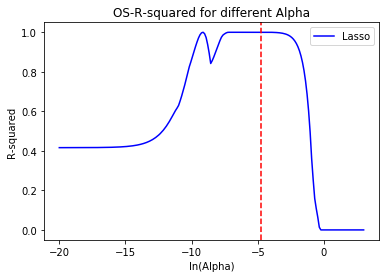

Optimal alpha for Lasso=0.00870621106113
The R-squared we found for test Lasso is: 0.996477276161
The R-squared we found for validate Lasso is: 0.999722002095


In [60]:
#select lambdas for Lasso 
alphas=np.exp(np.linspace(-20,3,200))
alpha_l_optimal=Regularization_fit_alpha_lasso(x_train,y_train,x_validate, y_validate, alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}'.format(alpha_l_optimal))


Lasso=linear_model.Lasso(fit_intercept=True,alpha=alpha_l_optimal)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(x_train,y_train)
# In the sample:
p_IS=Lasso.predict(x_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for test Lasso is: {0}".format(R_2_IS_Lasso))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(x_validate)
err_OS=p_OS-y_validate
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_validate)
print("The R-squared we found for validate Lasso is: {0}".format(R_2_OS_Lasso))

In [61]:
#report test R2
Lasso_coef

array([0.23412443, 0.24183367, 0.4486074 , 0.60615954, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [62]:
#visualize the model against all the data from training, validation and test samples 
#let's look at the final coefficients
name=["var_{0}".format(i+1) for i in range(10)] # Generate name of rows/variables

result=[name, np.ndarray.tolist(Lasso_coef)] # put all the estimations of different models together(it is same for OS and IS)
temp=pd.DataFrame(result).T
R2_IS=pd.DataFrame(['R2_IS',R_2_IS_Lasso]).T # paste the In sample R2 in the end of temp
R2_OS=pd.DataFrame(['R2_OS',R_2_OS_Lasso]).T # paste the Out of sample R2 in the end of temp

temp=temp.append(R2_IS)
result=temp.append(R2_OS)
result.columns=['','Lasso'] # Change the column name
result.set_index('')


,Lasso
,
var_1,0.234124
var_2,0.241834
var_3,0.448607
var_4,0.60616
var_5,0
var_6,0
var_7,0
var_8,0
var_9,0


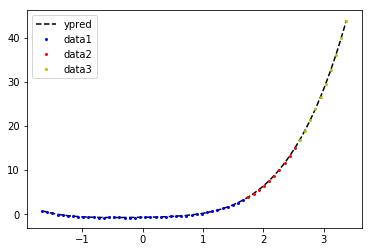

In [81]:
#visualization
lasso_arr = np.array(result['Lasso'])

#Lasso = linear_model.Lasso(fit_intercept = True, alpha = alpha_l_optimal)
data_all = data1.append(data1_2).append(data1_3)
data_all['ypred'] = Lasso.predict(data_all[data])


# plt.plot(data1.x1, data1.y, 'ro',markersize = 2)
# plt.plot(data2.x1, data2.y, 'yo', markersize = 2)
# plt.plot(data3.x1, data3.y, 'bo', markersize = 2)
plt.plot(data_all['x'], data_all['ypred'], 'k--')
plt.plot(data1.x1, data1.y, 'bo', markersize = 2, label = 'data1')
plt.plot(data1_2.x1, data1_2.y, 'ro', markersize = 2, label = 'data2')
plt.plot(data1_3.x1, data1_3.y, 'yo', markersize = 2, label = 'data3')
plt.legend()

### Question 2. P-values and hypothesis testing
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.02, 0.1, 3e-15, 0.04, 0.001, 0.06, 0.03.

For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero at the 95% confidence level? Please explain.

### ANSWER
for p-value < = 0.05, we could reject H0 hypothesis at the 95% confidence level. So that we could keep 1, 3, 4, 5, 7 regressors. And the smaller the p-value is, the more decisive the regressor is. 

### Question 3. Confidence intervals
Assume we perform a regression and get an estimate 10 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 95%-confidence interval is [-5, 5]

b. 99%-conficence interval is [9.99,10.01]

c. 95%-confidence interval is [9,100]

d. 99%-confidence interval is [8, 12], while 95%-confidence interval is [9, 11].

Explain your choices

### ANSWER
Statement A and D could be wrong. In this situation, the interval should be a range around 10. We can never infer a confidence interval base on another inverval range.

For statement c, this could also be wrong. When the data size is larger than 30, according to the central limit theorem, the distribution will be similar to gaussian distribution which is symmetric around the axis. Thus, except some extreme situation (eg. dichotomous data + data size is small), the statement c could also be wrong.

# Principal component regression

### Question 4

Using the median price per sq.foot from Zillow data below as reported for 2018-08, fit the linear model using N leading principal components of the 311 data and perform cross-validation. Visualize performance depending on the number N of leading PCs. Specifically: 
    1. implement a 20-times-cross-validation as a function of N returing OS R2
    2. run it for N=1,2,...30, return the best N and the corresponding R2
    3. mark it with a vertical line on the plot and put the value of N and the corresponding R2 as text labels
**Important:** keep training pca over the training sample only, applying the same pca transform to the test samples in order to prepare regressors for them

In [82]:
# Write code here
zillow = pd.read_csv("data/Zip_MedianListingPricePerSqft_AllHomes.csv",index_col=0)
zillow.head()

,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
RegionName,,,,,,,,,,,,,,,,,,,,,
10023,New York,NY,"New York, NY",New York,1,NaN,NaN,NaN,NaN,1366.621067,...,1954.992968,1983.055556,1963.986600,1702.573836,1522.948540,1568.100358,1612.378790,1569.371728,1599.538839,1619.794484
60614,Chicago,IL,"Chicago, IL",Cook,2,347.391304,333.975410,332.666667,324.490763,325.832510,...,514.255544,522.193211,519.321330,520.408163,476.592732,463.928571,470.769231,461.960986,455.861397,436.111111
79936,El Paso,TX,"El Paso, TX",El Paso,3,88.688320,88.159032,87.940589,87.929656,87.368706,...,88.419016,88.540363,88.755279,88.455330,88.367347,89.118199,90.128755,90.316333,90.726125,91.668726
10002,New York,NY,"New York, NY",New York,4,NaN,NaN,NaN,NaN,NaN,...,2041.247701,2043.165468,2063.785322,2012.302285,2015.369804,2026.353276,2022.274326,2013.831259,1997.942387,2030.259366
926,San Juan,TX,"Brownsville, TX",Cameron,5,NaN,NaN,NaN,NaN,NaN,...,92.968750,92.954963,93.776641,92.968750,95.090118,103.846154,100.411523,108.447489,102.270729,102.270729


In [83]:
zillow_1 =  pd.DataFrame(zillow['2018-08'])
zillow_1.rename(columns = {'2018-08': 'price'}, inplace = True)
zillow_1 = zillow_1.apply(pd.to_numeric, errors='coerce')
zillow_1['zipcode'] = zillow_1.index
zillow_1 = zillow_1.loc[zillow_1.price > 0]
zillow_1.head()

,price,zipcode
RegionName,,
10023,1619.794484,10023
60614,436.111111,60614
79936,91.668726,79936
10002,2030.259366,10002
926,102.270729,926


**Load/process 311 data**

In [84]:
data311 = pd.read_csv( 'data/aggr311.csv' , index_col=0 )
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001,Adopt-A-Basket,1
3,10003,Adopt-A-Basket,1
4,10009,Adopt-A-Basket,1
5,10010,Adopt-A-Basket,1


In [85]:
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0


In [86]:
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity

In [87]:
#merge the two datasets
DataPrice = zillow_1.merge(data311, left_index=True, right_index=True)
DataPrice.reset_index(drop = True, inplace = True)
DataPrice.head()

,price,zipcode,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
0,1619.794484,10023,0.000606,0.000000,0.011997,0.0,0.000121,0.004968,0.002545,0.000848,...,0.000242,0.000727,0.000000,0.016844,0.002908,0.000848,0.001939,0.031871,0.000000,0.0
1,2030.259366,10002,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.000000,0.0
2,1456.997085,10016,0.001143,0.000104,0.010907,0.0,0.000000,0.000208,0.002597,0.002181,...,0.000312,0.000208,0.000208,0.022021,0.000519,0.000727,0.000831,0.030851,0.000000,0.0
3,575.000000,11235,0.002950,0.000000,0.004597,0.0,0.000000,0.001647,0.003705,0.000755,...,0.000274,0.000069,0.001852,0.002813,0.000892,0.005283,0.001304,0.036844,0.000000,0.0
4,1798.307475,10009,0.001972,0.000104,0.010275,0.0,0.000000,0.000727,0.002180,0.001661,...,0.000623,0.000727,0.000934,0.007265,0.000623,0.000311,0.001038,0.033420,0.000104,0.0


In [104]:
data=DataPrice.iloc[:,2:]
Y=DataPrice.price
# lm=sm.OLS(Y,sm.add_constant(data)).fit()
# print lm.summary()

In [100]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS =  [[] for i in range (31)]
R_OS = [[] for i in range (31)] #lists for recording in-sample (training) and out-of-sample (test) R2
IS_plot = [] 
OS_plot = []
#30 runs
T = 20 #number of cross validation
for n in range(1, 31):
    for t in range(T):
        X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
        #now apply PCA to the training data
        pca = PCA(n) 
        P_train=pca.fit_transform(X_train)
        res=sm.OLS(y_train,sm.add_constant(P_train)).fit()
        #and apply the same rotation transform we learned for training sample to the test sample
        #this is important that we learn PCA transform from the training sample only rather than from both - training and test
        #as this is part of the principle component regression we need to train; and all training should happen over the training set
        P_test=pca.transform(X_test)
        y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
        #R_IS[n].append(res.rsquared)                                                                     
        R_OS[n].append(1-((y_pred-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
    #IS_plot.append(np.mean(R_IS[n]))
    OS_plot.append(np.mean(R_OS[n]))
    #print (n)
    #print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS[n]),np.std(R_IS[n])), "OS R-squared is %.3f+-%.3f"%(np.mean(R_OS[n]),np.std(R_OS[n])))
    #print("difference between IS and OS is %f"%(np.mean(R_IS[n]) - np.mean(R_OS[n])))
    #print ('\n')
    
                  
    
                   

In [99]:
#R_value_d = {"IS_plot" : IS_plot, "OS_plot": OS_plot}

R_value = pd.DataFrame(R_value_d, index = list(range(1,n+1)))
R_value

,IS_plot,OS_plot
1,0.214808,0.111190
2,0.813604,0.795118
3,0.812103,0.782326
4,0.822035,0.788769
5,0.830165,0.818007
6,0.850361,0.795653
7,0.851824,0.791112
8,0.869554,0.756632
9,0.885398,0.778805
10,0.889244,0.802667


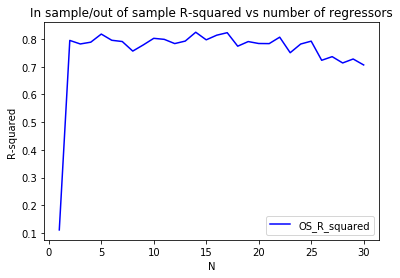

In [101]:
#visualize 
plt.title('In sample/out of sample R-squared vs number of regressors')
# plt.plot(R_value.index,R_value.IS_plot,'r',label='IS_R_squared')
plt.plot(R_value.index,R_value.OS_plot,'b',label='OS_R_squared')
plt.legend(loc='lower right')
plt.xlabel('N')
plt.ylabel('R-squared')
plt.draw()

### Question 5
1. Using the Zillow dataset from question 4, run PCA on the price dynamics for zip codes over the last 5 years 
    1. take only those zip codes within NYC having price defined for the last 60 months from 2013-09 till 2018-08:
    2. normalize each zip code timeline by average price over this period
    3. standardize those normalized prices per month and use them as features
    4. run pca over those features

2. Visualize zip codes in the 2d space of first two principal components, coloring them by borough (feel free to use borough definition from the class notebook). 

In [209]:
# Write code here
# Step A
zillow.head()
zillow_nyc = zillow[(zillow.index>=10000)&(zillow.index<11500)]
zillow_nyc

,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
RegionName,,,,,,,,,,,,,,,,,,,,,
10023,New York,NY,"New York, NY",New York,1,NaN,NaN,NaN,NaN,1366.621067,...,1954.992968,1983.055556,1963.986600,1702.573836,1522.948540,1568.100358,1612.378790,1569.371728,1599.538839,1619.794484
10002,New York,NY,"New York, NY",New York,4,NaN,NaN,NaN,NaN,NaN,...,2041.247701,2043.165468,2063.785322,2012.302285,2015.369804,2026.353276,2022.274326,2013.831259,1997.942387,2030.259366
10016,New York,NY,"New York, NY",New York,11,1046.811406,1040.166134,1046.774194,1042.471042,1006.896552,...,1546.285641,1557.564684,1538.800705,1345.275276,1327.586207,1389.792068,1433.631891,1433.902938,1444.833625,1456.997085
11235,New York,NY,"New York, NY",Kings,13,438.596491,438.027815,444.873031,440.236686,442.419807,...,589.335828,581.314948,578.947368,566.937120,561.356996,582.314205,584.002443,576.515881,577.477570,575.000000
10009,New York,NY,"New York, NY",New York,18,NaN,NaN,NaN,NaN,NaN,...,1808.655408,1844.537815,1840.555151,1781.808594,1730.285480,1760.563380,1731.472570,1758.405276,1761.241970,1798.307475
10029,New York,NY,"New York, NY",New York,20,NaN,NaN,NaN,NaN,NaN,...,1288.980433,1288.980433,1282.051282,1265.954845,1235.999167,1255.656109,1266.935681,1269.503546,1251.968504,1241.534989
10462,New York,NY,"New York, NY",Bronx,29,188.890607,191.797346,189.189189,188.937139,183.838384,...,196.202532,200.000000,198.666667,217.787837,220.000000,223.846154,234.939759,228.492107,226.363636,218.090909
11201,New York,NY,"New York, NY",Kings,40,811.060782,779.132791,789.898132,771.493300,742.122720,...,1362.549358,1374.292643,1362.266858,1314.635408,1131.850675,1211.015262,1275.075415,1284.756100,1285.159067,1296.747967
11214,New York,NY,"New York, NY",Kings,48,450.837054,414.879357,447.824883,430.032293,427.142857,...,593.030508,595.447955,556.794425,531.496063,529.855285,554.545455,589.428794,552.000000,561.936937,601.673642


In [210]:
# Step B
zillow_nyc = zillow_nyc.drop(columns = ['City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
zillow_nyc = zillow_nyc.iloc[:, 44:]

In [211]:
zillow_nyc = zillow_nyc.dropna(axis = 0, how = 'any')
zillow_nyc

,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
RegionName,,,,,,,,,,,,,,,,,,,,,
10023,1671.539961,1692.579505,1671.539961,1626.483292,1687.241963,1679.678610,1647.985348,1602.992987,1693.398425,1679.748823,...,1954.992968,1983.055556,1963.986600,1702.573836,1522.948540,1568.100358,1612.378790,1569.371728,1599.538839,1619.794484
10016,1208.647968,1240.693215,1338.257652,1288.714051,1341.698842,1287.390942,1290.475408,1361.205586,1357.735068,1343.503937,...,1546.285641,1557.564684,1538.800705,1345.275276,1327.586207,1389.792068,1433.631891,1433.902938,1444.833625,1456.997085
11235,442.216981,442.743009,437.367117,436.607143,436.303571,435.454545,430.821918,435.342870,434.631891,440.149254,...,589.335828,581.314948,578.947368,566.937120,561.356996,582.314205,584.002443,576.515881,577.477570,575.000000
10029,925.000000,946.875000,857.605178,825.504587,857.682409,877.767897,909.326186,1000.175070,940.169668,911.674923,...,1288.980433,1288.980433,1282.051282,1265.954845,1235.999167,1255.656109,1266.935681,1269.503546,1251.968504,1241.534989
10462,149.961919,149.020375,152.517483,153.395836,156.815440,156.001180,156.626733,160.087419,157.142857,157.142857,...,196.202532,200.000000,198.666667,217.787837,220.000000,223.846154,234.939759,228.492107,226.363636,218.090909
11201,993.464052,1014.677031,968.103392,997.150997,1002.227171,1013.942936,1017.699115,1040.264934,1015.371127,1034.768212,...,1362.549358,1374.292643,1362.266858,1314.635408,1131.850675,1211.015262,1275.075415,1284.756100,1285.159067,1296.747967
11214,396.643110,419.029544,422.218623,420.327304,420.327304,420.689968,418.563923,421.052632,435.775452,425.101215,...,593.030508,595.447955,556.794425,531.496063,529.855285,554.545455,589.428794,552.000000,561.936937,601.673642
11229,365.176152,375.583192,395.599490,394.770408,389.398937,331.057988,330.357143,319.901316,320.216049,320.058683,...,615.537849,626.999557,615.753425,613.883064,600.693750,618.823529,630.588235,620.765631,605.823157,608.660786
11234,384.239956,390.324519,392.857143,387.171221,380.036630,374.117647,375.818236,379.389666,379.529606,378.582858,...,482.647269,478.410053,477.123792,468.583932,464.221154,480.970149,492.742272,492.742272,495.879271,501.846779


In [212]:
#step c
#nor
zillow_nyc_c = zillow_nyc.div(zillow_nyc.sum(axis = 1), axis = 0)
#std
zillow_nyc_c = (zillow_nyc_c - zillow_nyc_c.mean())/ zillow_nyc_c.std()

In [213]:
zillow_nyc_c.shape

(126, 60)

In [214]:
scaler_z = preprocessing.StandardScaler().fit(zillow_nyc_c)
data_z=scaler_z.transform(zillow_nyc_c)  
# create borough labels 
# This part is copied from ADS 2018 Session 5 Example
Z=np.array(zillow_nyc_c.index)
manhattanInd=(Z>10000)&(Z<10300) #Manhattan
statenInd=(Z>=10300)&(Z<10400) #Staten Island
brooklynInd=(Z>=11000)&(Z<11300) #Brooklyn
queensInd=(Z>=11300)&(Z<11500) #Queens
bronxInd=(Z>=10400)&(Z<10500) #Bronx
#create an array of the same length as data311 index providing the borough number
D=Z*0
D[manhattanInd]=1
D[statenInd]=2
D[brooklynInd]=3
D[queensInd]=4
D[bronxInd]=5

In [215]:
zillow_nyc_c

,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
RegionName,,,,,,,,,,,,,,,,,,,,,
10023,0.231347,0.319103,0.219173,-0.023534,0.348061,0.250989,-0.068722,-0.482426,0.078894,-0.060545,...,-0.236287,-0.076028,-0.225743,-1.961033,-2.927642,-2.840736,-2.667475,-2.880582,-2.630112,-2.452511
10016,-0.929115,-0.713846,0.075095,-0.272711,0.121799,-0.331297,-0.461719,0.022892,-0.066622,-0.240077,...,-0.568189,-0.494136,-0.662717,-2.261131,-2.218148,-1.946199,-1.721090,-1.717988,-1.599179,-1.471171
11235,-0.548587,-0.574124,-0.665166,-0.648948,-0.703840,-0.710233,-1.009381,-1.015453,-1.129005,-1.072703,...,0.490398,0.270456,0.183982,-0.077843,-0.136960,0.084676,-0.004120,-0.228694,-0.214058,-0.245523
10029,-0.577085,-0.383885,-1.298796,-1.620237,-1.339957,-1.081543,-0.946683,-0.025539,-0.794136,-1.215562,...,1.075392,1.027792,0.907413,0.772979,0.476730,0.437662,0.425145,0.362594,0.172368,0.084429
10462,-0.779092,-0.873806,-0.623801,-0.532799,-0.349227,-0.409172,-0.529421,-0.401655,-0.685723,-0.754217,...,-0.075705,0.148384,0.030902,1.325766,1.455434,1.439218,1.989974,1.453987,1.274251,0.795197
11201,-1.175040,-1.010972,-1.415989,-1.121533,-1.133627,-0.989668,-1.166317,-1.056886,-1.410992,-1.299492,...,-0.007990,0.076715,-0.065902,-0.519524,-2.112096,-1.600113,-1.135148,-1.075001,-1.049805,-0.921679
11214,-1.208243,-0.725137,-0.624143,-0.634495,-0.681948,-0.662899,-0.900505,-0.951894,-0.666758,-1.019669,...,1.132720,1.141529,0.189868,-0.404953,-0.361244,-0.033632,0.623754,-0.276050,-0.072444,0.752463
11229,-1.471629,-1.247741,-0.735885,-0.724155,-0.910713,-2.282325,-2.627470,-3.028323,-3.186786,-3.354984,...,2.499537,2.712686,2.360505,2.409946,2.022209,2.189448,2.323534,1.934489,1.534362,1.578471
11234,0.033472,0.154263,0.255173,0.146746,-0.080272,-0.262260,-0.363218,-0.368281,-0.437184,-0.525844,...,0.465954,0.311768,0.242563,0.020167,-0.038382,0.170038,0.353132,0.268297,0.324644,0.473888


In [216]:
pca = PCA(zillow_nyc_c.shape[1])
P = pca.fit_transform(zillow_nyc_c)

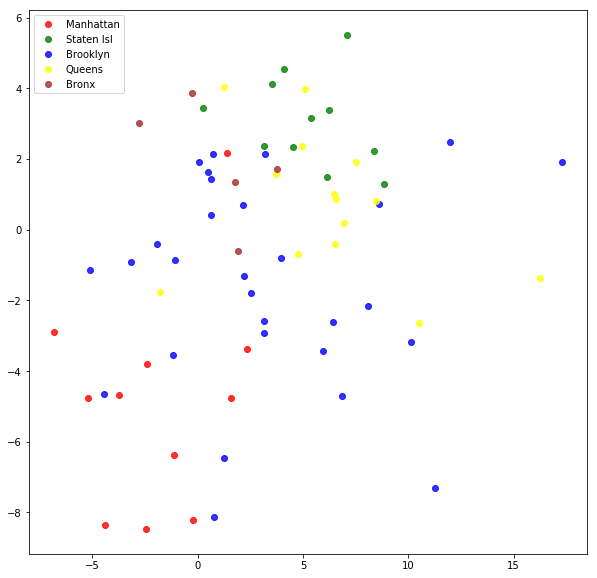

In [217]:
#2-d plot
colors=('gray','red','green','blue','yellow','brown')
fig = plt.figure(figsize=(10,10))
for d in range(1,6):
    plt.plot(np.array(P[D==d,0]), np.array(P[D==d,1]), 'o', color=colors[d], alpha=0.8, label=d)
plt.legend(['Manhattan','Staten Isl','Brooklyn','Queens','Bronx'],loc='upper left')